# [ES-21AC] State Prisons and County Jails



---
### Professor: Victoria Robinson 
### Data Science Fellow: Phillip Pierini

The goal of this project is for students to understand that they can do social work using data. This notebook explores the incarceration trends and impacts of prison realignment in California. 

*Estimated Time: 60 minutes*

---

### Table of Contents

[THE DATA](#sectiondata)<br>


[CONTEXT](#sectioncontext)<br>


[PRISONS](#section1)<br>
1. [DATA](#subsection1)<br> 
2. [DATA ANALYSIS](#subsection2)<br>
3. [GENERAL: DESIGNED & STAFFED CAPACITY](#subsection3)<br>
4. [GENDER DIVISION](#subsection4)<br>

---



**Please run the cell below before you begin.**

**Dependencies:**

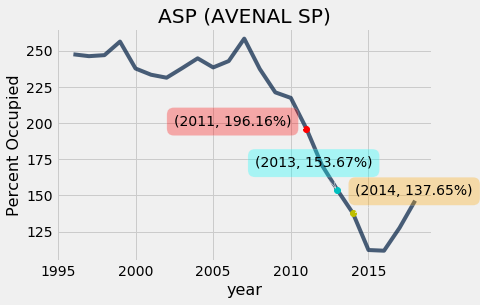

In [1]:
from datascience import *
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import ipywidgets as widgets
%run Data_Cleaning_and_Helper_Functions.ipynb

---

## THE DATA <a id='sectiondata'></a>
---

We will be completing two notebooks. The first one will inform you about the state prisons and the second one about the county jails. 

In this notebook, you will use data from the CDCR (California Department of Corrections and Rehabilitation).

The CDCR reports the number of people in state prisons across California. On this data set, you will find information including the capacity (staff & design) of each prison, and the current population. This will provide with a framework to understand prison overcrowding and the effectiveness of policy to reduce it. 

If you are interested in learning more please visit:

[CDCR data and infromation](https://github.com/nrjones8/cdcr-population-data)

---
## CONTEXT  <a id='sectioncontext'></a>
---

During the course, we have learned about the policies of realignment, incarceration, and crime trends in California. By exploring these datasets we hope to get a clear picture of the magnitude of prison and county jail overcrowding per facility and region, and the effects of realignment policies in state prisons and county jails.



The key difference between state prisons and jails involve the process of sentencing. Prisons are designed for long term sentences, while jails are for those who are unsentenced or have short term sentences. (Short-term sentences are generally one year or less.) Prisons are larger and controlled at the state level. In contrast, jails are smaller and handled by a city or county.



The relationship between the two institutions is emphasized by mass incarceration. Through this activity, we will analyze how overcrowding within California’s state prisons influenced the size of jail populations after realignment policies were implemented.



---
# PRISONS<a id='section1'></a>
---
To observe how realignment influenced California's prisons and jails, we obtained data from 1996 to 2018, so that we could understand the trend over time. We will start by observing California's state prisons using the data we found through the CDCR (California Department of Corrections and Rehabilitation).


## 0. DATA<a id='subsection1'></a>
---

### 0.1  Data Dictionary 

Below you will find a data dictionary for future reference. 

|Column Name   | Description |
|--------------|---------|
|year |Year that the data was collected  |
|month | Month that the data was collected |
|institution_name |  Abbreviated Name of the State Prison|
|population_felons | People imprisoned for committing felony (serious or violent crime) |
|civil_addict | People imprisoned for drug related offenses |
|total_population | Sum of civil addict and population felons columns|
|designed_capacity | Max number of people the prison was built to hold|
|percent_occupied | Percentage of people incarcerated out of designed capacity|
|staffed_capacity | Max number of people the prison can hold based on the number of people employed|

### 0.2 Importing the Data


On the cell below, we will import the tabular data from `monthly_cdcr.csv` into a table, and save it into a new variable called `data`.

In [2]:
prisons = Table().read_table("monthly_cdcr.csv")

Since we will try to understand trends over time, it might be helpful to **sort** the data by year. We will do this by running the cell below using the `sort` function:

In [3]:
prisons.sort("year").show(20)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
0,1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
3,1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
4,1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
5,1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
6,1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484
7,1996,1,SCC (SIERRA CONSERVATION CENTER),6010,0,6010,3606,166.7,5884
8,1996,1,SRTA (SANTA RITA CO. JAIL-RC),811,0,811,395,205.3,750
9,1996,1,RJD (RJ DONOVAN CORRECTIONAL FAC),4577,0,4577,2200,208,4566


---
## 1. DATA ANALYSIS<a id='subsection2'></a>
---

When processing a new data set, it is a good idea to play around with the data, and try to combine it in different ways. To start it's good to think about how many times we expect each prison to occur in our dataset, and how many times they **actually** appear. 

Our dataset is made up of prisons in California from the year 1996 to 2018. The counts in our data set were done monthly, meaning for each year we expect there to be at most 12 counts for each prison. Let's calculate the number of times we expect each prison to appear.

In [1]:
months = 12
years = 2018 - 1996 + 1 # add 1 so that 1996 is included.

months * years

276

We would expect there to be a maximum number of times for a single institution to appear to be 276 times, which is equivalent to once a month for 23 years.

To find the number of times that each institution appears in our data set, we would have to group by the institution name. Essentially, we want our computer to make groups that only have values from the same prison. After we have made these groups, we want to group how many things we have in each group. 

The code that corresponds to this is to use the function `group()`. The `group()` function takes in a column name and puts all the similar values in that column into groups, then it counts the number of items in the group.

Then, we can use the `sort()` function to order the counts in a specific order.

In [5]:
prisons.group("institution_name").sort("count", descending = True).show()

institution_name,count
SCC (SIERRA CONSERVATION CENTER),392
"LAC (CA SP, LOS ANGELES COUNTY)",283
VSP (VALLEY SP),279
WSP (WASCO SP),276
SQ (SAN QUENTIN SP),276
"SOL (CA SP, SOLANO)",276
"SAC (CA SP, SACRAMENTO)",276
RJD (RJ DONOVAN CORRECTIONAL FAC),276
PVSP (PLEASANT VALLEY SP),276
PBSP (PELICAN BAY SP),276


What do we notice from this table? We can see that there are values in our table that went against what we had expected. We had expected all prisons to appear 276 times, but we can see that there are prisons with less than and greater than 276.

*Possible Explanations*:
- Less than 276: these prisons do not have data over all 23 years, they are may be missing information or their dates do not start in 1996.
- Greater than 276: these prisons have multiple counts for some months.


The case where we have counts greater than 276 is interesting. Why would do we need two separate counts of the number of people in a prison? What is the significance of these counts, meaning what makes one count in a month different from the other count in that same month?

To understand why we have different counts, we must research those interesting prisons. Thus, the prisons we will observe in the rest of this section are:
- Valley State Prison (VSP)
- Sierra Conservation Center (SCC)
- Los Angeles County State Prison (LAC)

---
On the following section, we will explain what we think is the cause of "inconsistency" in the data, and how we decided to handle it. Then, we will read a data table with the "cleaned" data using `Table().read_table()` and assign it to a new variable.
Though we denoted them as "inconsistencies", we urge you not to look at this as mistakes in the data but try to think how they fit into the major issues we have learned about in the class.

---

### The Case of Valley State Prison

From outside research, we discovered that Valley State Prison changed from a female prison to a male prison in 2012 (October 2012 to be exact). However, all rows are labeled as a male institution. For future analysis, it would be better to separate VSP into its’ female and male years. Thus, we decided to split and relabeled the VSP data into male and female parts.

In [6]:
prisons_1 = Table().read_table("data/prisons1.csv")
prisons_1.where('institution_name', are.containing("VALLEY SP (")).show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
0,1996,1,VALLEY SP (FEMALE),2294,0,2294,1980,115.9,1980
34,1996,2,VALLEY SP (FEMALE),2096,0,2096,1980,105.9,2184
68,1996,3,VALLEY SP (FEMALE),2326,7,2333,2380,98,2584
102,1996,4,VALLEY SP (FEMALE),2498,13,2511,2380,105.5,2584
136,1996,5,VALLEY SP (FEMALE),2562,9,2571,2380,108,2584


### The Case of Sierra Conservation Center (SCC)

For the Sierra Conservation Center, there were many double counts for each month. When we researched why there were separate counts for the same prison, it was unclear. One count had values in the thousands, while the other count was in the hundreds. Our best guess is that the prison counted the number of people within a fire camp nearby. We split and relabeled our data to show the difference between the smaller and larger population.

In [7]:
prisons_2 = Table().read_table("prisons2.csv")
prisons_2.where('institution_name', are.containing("SIERRA")).show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
7,1996,1,SIERRA CONSERVATION CENTER (PRISON),6010,0,6010,3606,166.7,5884
41,1996,2,SIERRA CONSERVATION CENTER (PRISON),5912,0,5912,3606,163.9,5884
75,1996,3,SIERRA CONSERVATION CENTER (PRISON),5912,0,5912,3606,163.9,5884
109,1996,4,SIERRA CONSERVATION CENTER (PRISON),5979,0,5979,3606,165.8,5884
143,1996,5,SIERRA CONSERVATION CENTER (PRISON),5884,0,5884,3606,163.2,5884


### The Case of Los Angeles County State Prison (LAC)	

In the case of Los Angeles County, we saw that less than a one year period from December 2005 to June 2006 was there a double count recorded in the prison population. Although we are unsure what caused the changes between the two groups, we saw that one group had a population size ranging in the four thousand while the other group was less than one thousand. We split and relabeled our data to show the difference between the smaller and larger population

In [8]:
prisons_3 = Table().read_table("prisons3.csv")
prisons_3.where('institution_name', are.containing("LOS")).show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
23,1996,1,LOS ANGELES COUNTY (STATE PRISON),3978,0,3978,2200,180.8,4000
57,1996,2,LOS ANGELES COUNTY (STATE PRISON),3919,0,3919,2200,178.1,4000
91,1996,3,LOS ANGELES COUNTY (STATE PRISON),3975,0,3975,2200,180.7,4000
125,1996,4,LOS ANGELES COUNTY (STATE PRISON),4064,0,4064,2200,184.7,4000
160,1996,5,LOS ANGELES COUNTY (STATE PRISON),4012,0,4012,2200,182.4,4000



## 2. GENERAL: DESIGNED & STAFFED CAPACITY<a id='subsection3'></a>
---

### 2.1 Designed Capacity of California's Prisons over time

**Context**: The Prison Industrial Complex has created our current issue with mass incarceration. Throughout the course, you have learned how prisons are designed to hold large numbers of people, and how creating these large institutions perpetuates the cycle of mass incarceration, because these prisons are made to be filled. In this next section, we will break down how the designed capacity of prisons is related to the actual population within a given institution. We will later compare the total population with the number of people employed to sustain this system.

**Data Cleaning**: Let's look at how the size of prison populations has changed over time in regards to the number of inmates the prison is designed to hold. It is not necessary to look at the whole table, thus we will only look at the following variables: `year`, `institution_name`, `designed_capacity`. We use the function `select()` to cut the data table and save it to a new variable called `year_and_design_capacity` as we will be working with this later. Finally, we use `show` to limit the number of rows that appear in our table.  

**BEFORE YOU CONTINUE**:

From now on, we will use an updated version of the `prisons` table that incorporates the three data table changes we made above. We will call it this `prisons_updated`.

In [9]:
prisons_updated = prisons_3

In [10]:
year_and_design_capacity = prisons_updated.select("year", "institution_name",'designed_capacity')
year_and_design_capacity.show(3)

year,institution_name,designed_capacity
1996,NCWF (NO CAL WOMEN'S FACIL),400
1996,CCWF (CENTRAL CA WOMEN'S FAC),2004
1996,"CRC (CAL REHAB CTR, WOMEN)",500


Now we want to see what is the `designed_capacity` for **all** the prisons in a given year. We will do this by grouping by **year** using the function `group` and summing over all the prisons in that year. Since we are only looking at *designed_capacity*, we can temporarily remove `institution_name` from the data table for this question. 

In [11]:
design_capacity_ca = year_and_design_capacity.drop("institution_name").group("year", sum)
design_capacity_ca.show(3)

year,designed_capacity sum
1996,873676
1997,910797
1998,956740


**Plotting**: Although we can spend a lot of time comparing the values for designed capacity for each year and notice a pattern, often times it is more useful to visually inspect the information as it might reveal useful insights and provide a context to the data we are looking at. 

Below we drew a line plot to reflect the **changes in design capacity of California's state prisons over time**.

The format for plotting is: 
* **To draw plot**:
*data_table*.`plot(`*x_variable*, *y_variable*`)`. Where the x and y variables stand for the name of the columns in our data table
* **To label plot**: We use `plt.xlabel`(*x_axis name*), `plt.ylabel`(*y_axis name*), `plot.title`(*plot_title*)

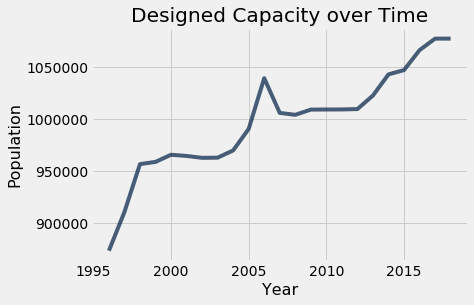

In [12]:
design_capacity_ca.plot("year", "designed_capacity sum")

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Designed Capacity over Time")

We will focus on some years that mark important shifts as a result of realignment.

Let's look at the year **2011**. 


In [13]:
design_capacity_2011 = design_capacity_ca.where("year", 2011)
design_capacity_2011

year,designed_capacity sum
2011,1009197


 **To add red dots**: `plt.plot`(*x_coordinate*, *y_coordinate*, *line property* ). 

Using **total_capacity_2011**, can now assign **x_coordinate_2011** to the **year** column and the **y_coordinate_2011** to the **designed_capacity sum** column. 


In [14]:
x_coordinate_2011 = design_capacity_2011.column('year')
y_coordinate_2011 = design_capacity_2011.column("designed_capacity sum")

Now you are ready to add the dot to the plot.

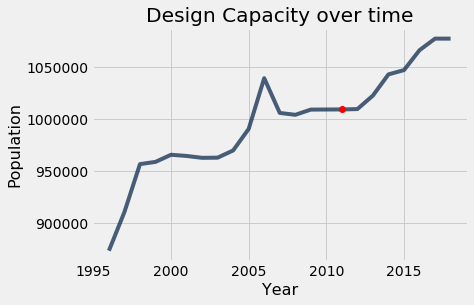

In [15]:
design_capacity_ca.plot("year", "designed_capacity sum")

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Design Capacity over time")

plt.plot(x_coordinate_2011, y_coordinate_2011, 'ro')

### Question 1

**Looking at the graph produced in the section above how does it reflect the systematic changes of Califonia's potential prison population? Name a court case that is represented by a red dot on the plot above.**

*double click this cell to type your response*

### Question 2

**What do you think happened in 2006 that caused that spike?**

*double click this cell to type your response*

### 2.2 Total Population in California's Prisons over time

Through the last section, we observed the change in the number of people California's prisons are designed to hold. Given this change over time, we wanted to compare it with the actual number of people within California's prisons. To do this, we will calculate the percent at which prisons were filled based on *how many people each prison is designed to hold*. Here is our original dataset for reference:

In [16]:
prisons.show(3)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
0,1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760


**Data Cleaning**: Let's look at how the prison population changed over time in regards to the number of incarcerated people prison is designed to hold. It is not necessary to look at the whole table, thus we will only look at the following variables: `year`, `total_population`, `designed_capacity`. Just like in the last section, we use the function `select()` to cut the data table and save it to a new variable called `prison_pop_design` as we will be working with this later. Finally, we use `show` to limit the number of rows that appear in our table.  

In [17]:
total_pop_and_design = prisons_updated.select("year", "total_population", "designed_capacity")
total_pop_and_design.show(5)

year,total_population,designed_capacity
1996,790,400
1996,2859,2004
1996,794,500
1996,1726,1026
1996,4537,2484


Now we want to see what is the `designed_capacity` and `total_population` for **all** the prisons in a given year. We will do this by grouping by **year** using the function `group` and summing over all the prisons in that year so that we can see how the population changed over time.

In [18]:
sum_total_and_design = total_pop_and_design.group("year", sum)
sum_total_and_design.show(5)

year,total_population sum,designed_capacity sum
1996,1623806,873676
1997,1739423,910797
1998,1788142,956740
1999,1818019,958881
2000,1820519,965721


Calculated the percentage of people within California's prisons with respect to the designed population size for **all** prisons within a certain year. Note: we are calculating the percentage, so we will be multiplying our proportion by 100.

To do this, we will get the values from our table by using the `column()` function. The `column()` function gets all the values from a single column in our table, and make them an array.

From class, we learned that despite their designed bed space, prisons are overcrowded. In this section, we will explore how much.

In [19]:
total_population = sum_total_and_design.column("total_population sum") 
designed_sum = sum_total_and_design.column("designed_capacity sum")

capacity_percentage = (total_population / designed_sum) * 100
capacity_percentage

array([ 185.85905988,  190.97812136,  186.89947112,  189.59797931,
        188.51397039,  186.46297264,  186.17592316,  188.84950734,
        192.63564133,  190.09189001,  188.49532912,  195.52605312,
        190.30095205,  183.36618572,  178.73669545,  173.23535445,
        149.88321645,  144.95077023,  138.83530151,  132.72696534,
        131.7232109 ,  132.02795138,  131.94811151])

Now that we have these percentages, we must add them to our table, so that we can graph them. To add another column to a table, we use the function called `with_column()`. The `with_column()` function adds a column to a table when it is given a new column name and the column values. The format is:  *data_table*`.with_column(`*column_name, column_values*`)`

In [20]:
total_and_design_and_percentages_table = sum_total_and_design.with_column("Design Percent", capacity_percentage)
total_and_design_and_percentages_table.show(3)

year,total_population sum,designed_capacity sum,Design Percent
1996,1623806,873676,185.859
1997,1739423,910797,190.978
1998,1788142,956740,186.899


### Question 1
**What can you tell about the design percent column in our table?**

*double click this cell to type your response*

Now let's plot how overcrowding has changed over time, by observing the change in the percentage of people within prisons in comparison to how many people prisons are designed to hold.

**Plotting**: Using the same technique as above, below we drew a line plot to reflect the **overcrowding of California's state prisons over time**.

The format for plotting is: 
* **To draw plot**:
*data_table*.`plot(`*x_variable*, *y_variable*`)`. Where the x and y variables stand for the name of the columns in our data table
* **To label plot**: We use `plt.xlabel`(*x_axis name*), `plt.ylabel`(*y_axis name*), `plot.title`(*plot_title*)

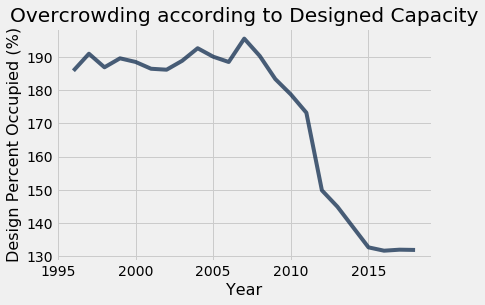

In [21]:
total_and_design_and_percentages_table.plot("year", "Design Percent")

plt.xlabel("Year")
plt.ylabel("Design Percent Occupied (%)")
plt.title("Overcrowding according to Designed Capacity")


### Question 2
**What is the trend of the line?**

*double click this cell to type your response*

### 2.3 Staffed Capcacity

We have seen how prisons exceed the number of people allowed per designated space. However, a key aspect to these institutions are the hundreds of people employed to maintain this system. The number of people needed to maintain this system differs from both the number of people within these institutions and the number of people these institutions are designed to hold. We will observe the differences in the following section.

Similar to the sections above, we will use the `select()` function to look at the following variables: `year`, `total_population`, `staffed_capacity`.

In [22]:
total_pop_and_staff = prisons_updated.select("year", "total_population", "staffed_capacity")
total_pop_and_staff.show(3)

year,total_population,staffed_capacity
1996,790,760
1996,2859,3224
1996,794,842


To see what the `staffed_capacity` and `total_population` for **all** the prisons in a given year, we will group by **year** using the function `group` and summing over all the prisons in that year, so that we can see how the population changed over time.

In [23]:
pop_and_staff_sum = total_pop_and_staff.group("year", sum)
pop_and_staff_sum.show(3)

year,total_population sum,staffed_capacity sum
1996,1623806,1603264
1997,1739423,1713086
1998,1788142,1788475


Likewise, to the previous example, we want to calculate a proportion in this question as well. This time we want to calculate the proportion of people within a single prison given the amount of staff employed to maintain the prison.

In [24]:
population_column = pop_and_staff_sum.column("total_population sum")
staff_capacity_column = pop_and_staff_sum.column("staffed_capacity sum")

staff_capacity_percentage = (population_column / staff_capacity_column)* 100
staff_capacity_percentage

array([ 101.28126123,  101.53740092,   99.98138079,   99.77159239,
         99.58683247,   99.48019624,   99.67990711,   99.20419093,
         99.2917914 ,   98.58947776,  100.15123527,   98.60342226,
         98.65553117,   97.77068179,   98.05314295,   99.07368789,
         98.33165891,  100.11090436,   95.30052336,   90.83579994,
         91.49697673,   96.43139026,   96.93737037])

Using these calculated percentages, we will add them to our table. Recall the previous example, to add another column to a table, we use the function called `with_column()`. 
- *data_table*`.with_column(`*column_name, column_values*`)`

In [25]:
staff_and_total_percent_table = pop_and_staff_sum.with_column("Staff Percent", staff_capacity_percentage)
staff_and_total_percent_table.show(3)

year,total_population sum,staffed_capacity sum,Staff Percent
1996,1623806,1603264,101.281
1997,1739423,1713086,101.537
1998,1788142,1788475,99.9814


To illustrate the change over time, we will create a line plot to reflect the **overcrowding of California's state prisons over time according to the staffing capacity of prisons.**

The format for plotting is: 
* **To draw plot**:
*data_table*.`plot(`*x_variable*, *y_variable*`)`. Where the x and y variables stand for the names of the columns in our data table
* **To label plot**: We use `plt.xlabel`(*x_axis name*), `plt.ylabel`(*y_axis name*), `plot.title`(*plot_title*)

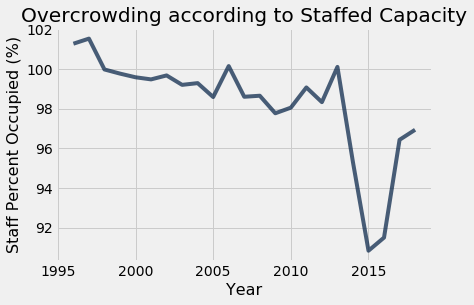

In [26]:
staff_and_total_percent_table.plot("year", "Staff Percent")

plt.xlabel("Year") 
plt.ylabel("Staff Percent Occupied (%)")
plt.title("Overcrowding according to Staffed Capacity")

### Question 1

**What trend do you notice on the line plot?**

*double click this cell to type your response*

### 2.4 Designed Capacity versus Staff Capacity

Through the last two examples, we saw how crowded prisons have been overtime by looking at their designed capacity and staffed capacity. However, it is still unclear what the difference between the two percentages is. Therefore, to compare the two capacity rates and how they have changed over time we will create a new plot.

To do this, we will create a new table with three columns, namely 
* Year
* Design Percentage
* Staff Percentage


*Please refer to the intro to Python notebook if you do NOT recall how to make a table*

To get the **years** in our table we will use a function called `np.arange` since we know the range for the years we want to use. We will illustrate with an example below. Notice that the upper bound is **NOT** inclusive. Thus, we will have to add 1 to the year in which we want to end. 

The other two columns can be obtained by calling the variables we had defined in the sections before. Namely, **capacity_percentage** for Design Percentage and **staff_capacity_percentage** for Staff Percentage

In [27]:
lower_bound = 1996 
upper_bound = 2018 + 1
years = np.arange(lower_bound,upper_bound)
years

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018])

In [28]:
compare_table_design_and_staff = Table().with_columns(["year", years,
                                    "Design Percentage", capacity_percentage,
                                    "Staff Percentage", staff_capacity_percentage])

compare_table_design_and_staff.show(5)

year,Design Percentage,Staff Percentage
1996,185.859,101.281
1997,190.978,101.537
1998,186.899,99.9814
1999,189.598,99.7716
2000,188.514,99.5868


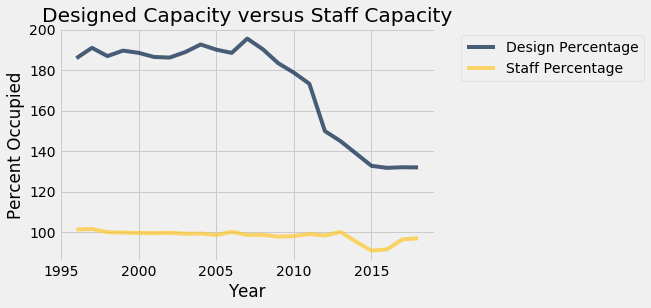

In [29]:
compare_table_design_and_staff.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity versus Staff Capacity")

### Question 4
**Consider the large gap between the two lines. Why is staff capacity much closer to 100% than designed capacity?**

*double click this cell to type your response*

### 2.5 Interactive Widget

We have created an interactive widget for you in this section. In this example, you will be able to scroll through all of the prisons in Calfornia, and you can see how the designed capacity versus population has changed over time.
Run the following cell to produce the widget

In [30]:
widgets.HBox([widgets.VBox([inp]), out])

### Question 5
**Select any institution from the widget that has 3 points on its graph and analyze how that institution's designed capacity changed over time. Predict how would the design capacity compare with the staff capacity of that specific institution.**

*double click this cell to type your response*

## 3. GENDER DIVISION <a id='subsection4'></a>
---
**Context:** The system reinforces the idea that the average inmate holds certain characteristics. Since we have limited data sets we cannot investigate many aspects of this claim. However, in order to get a better understanding of the populations that the prison industrial complex was made to hold, we will investigate a few variables such as gender divisions, design capacity, and staff capacity. 


Let's begin by looking at all the **unique** institutions on our dataset. To do this, we will use the `group` function. The count of the table below represents the number of months for which we have data for a given institution. The maximum counts that any of the institutions *should* have is 276 since we are only looking at 23 years (12 months/year X 23 years).

In [31]:
prisons_updated.group("institution_name").show()

institution_name,count
ASP (AVENAL SP),276
CAL (CALIPATRIA SP),276
CCC (CA CORRECTIONAL CENTER),276
CCI (CA CORRECTIONAL INSTITUTION),276
CCWF (CENTRAL CA WOMEN'S FAC),276
CEN (CENTINELA SP),276
CHCF (CA HEALTH CARE FAC - STOCKTON),66
CIM (CA INSTITUTION FOR MEN),276
CIW (CA INSTITUTION FOR WOMEN),276
CMC (CA MEN'S COLONY),276


Since the data is made up of both male and female prisons. We have to sort these prisons into separate groups before we can analyze them separately. However, the institution names in our table are not always easy to decipher as male or female institutions. We had to double check whether an institution was male or female using sources outside of this notebook. One of the institutions that we found to be particularly interesting when looking at these outside sources was **VSP (VALLEY SP)**.
The California Department of Corrections and Rehabilitation began converting Valley State Prison into a facility for low-risk male inmates in October 2012, and it completed by January 2013. 
[Press here to learn more](https://web.archive.org/web/20120111104018/http://cdcrtoday.blogspot.com/2011/12/cdcr-announces-plan-to-convert-female.html) and [Here](https://www.cdcr.ca.gov/Facilities_Locator/VSP.html) From these links you will learn that this shift came as a result of the policy of realignment. We can also notice that monthly count for this institution was above of 276, which could indicate monthly double counts for male and female during this period. Though we handled this issue before we read the data at the beginning of the notebook, running these sanity checks is important to not get misleading results. 

### 3.1 Unique Female Prisions

In this section, we will find all the data corresponding to female institutions. In the cell below, we look only at the prisons which we know are strictly female.

Recall the first section where we separated the data for VSP into male and female sections, so that we could use them now. 

In [32]:
female_institutions = make_array("CCWF (CENTRAL CA WOMEN'S FAC)", 'CIW (CA INSTITUTION FOR WOMEN)',
       'CRC (CAL REHAB CTR, WOMEN)', 'FOL (FOLSOM SP) (FEMALE)',
       'FRCC (FRCCC BAKERSFIELD)', "NCWF (NO CAL WOMEN'S FACIL)", "VALLEY SP (FEMALE)")

**Filtering**: Often times we want to look at a portion of the data that meets certain conditions so that we can view a pattern among smaller portions of the data. In this case, we want to observe the difference between female and male institutions. To do that we are filtering data into two groups. The first contains **only female institutions** and the second contains only male institutions. 

Filtering works by looking at a single column of values and checking the filtering condition to see if each value in the column is true. All of the true values are put into a new table. 

The format for filtering is: 
* **To filter table**:
*data_table*.`where(`*column_name*, *filter*`)`. 
    - the `column_name` is one of the columns in the data_table
    - the `filter` has two parts:
        - there must be some condition to the values we are looking at: `are.equal_to()`, `are.contained_in()`, `are.not_contained_in()`
        - the second part is the input to the first part. (can be a number or a word or list)

In [34]:
female_data = prisons_updated.where("institution_name", are.contained_in(female_institutions))
female_data.show(3)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
3,1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
4,1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842


Now we will group together each institution to learn about the number of occurrences for each institution. 

In [35]:
female_prisons = female_data.group("institution_name")
female_prisons

institution_name,count
CCWF (CENTRAL CA WOMEN'S FAC),276
CIW (CA INSTITUTION FOR WOMEN),276
"CRC (CAL REHAB CTR, WOMEN)",138
FOL (FOLSOM SP) (FEMALE),72
FRCC (FRCCC BAKERSFIELD),17
NCWF (NO CAL WOMEN'S FACIL),85
VALLEY SP (FEMALE),204


### 3.1.1 Design Capacity versus Staff Capacity for Female Institutions

Similar to the last section, we will use the `select()` function to get relevant data.

In [36]:
fem_year_pop_capacities = female_data.select("year", "total_population", "designed_capacity", "staffed_capacity")
fem_year_pop_capacities.show(3)

year,total_population,designed_capacity,staffed_capacity
1996,790,400,760
1996,2859,2004,3224
1996,794,500,842


We want to combine all the values for the same year, so we will use the `group()` function.

In [41]:
fem_year_groups = fem_year_pop_capacities.group("year", sum)
fem_year_groups.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum
1996,108007,72120,104654
1997,120200,70920,115384
1998,125888,70920,123282


Using the same technique as the other example, we will calculate the percent occupied for female prisons. First, we will do this for designed capacity and directly after we will calculate for staffed capacity.

Let's begin by getting the female total population. We will do this by selecting the column we are interested in, and then add it to a new variable called `female_total_population`.

In [42]:
fem_total_population = fem_year_groups.column("total_population sum") 

Now we will calculate the design capacity percentages and the staff capacity percentages.

In [43]:
fem_design_capacity = fem_year_groups.column("designed_capacity sum")

fem_design_percentage = (fem_total_population / fem_design_capacity) *100
fem_design_percentage[1]

169.4867456288776

In [44]:
fem_staff_capacity = fem_year_groups.column("staffed_capacity sum")

fem_staff_percentage =(fem_total_population / fem_staff_capacity)*100
fem_staff_percentage

array([ 103.20389092,  104.17388893,  102.11385279,   98.5043845 ,
        100.29576714,   99.26380683,  100.40932828,  101.93347193,
        100.57430312,  104.14789159,  102.9611944 ,   98.83839444,
         98.81032945,   97.20246599,   96.3765347 ,   97.98165807,
         96.07339952,  101.42329767,  100.96428124,   88.56918109,
         86.04898387,   95.87570793,   96.5775201 ])

With the percentages we just calculated we want to add them to the table, so we will use the `with_column()` function.

In [45]:
fem_year_design = fem_year_groups.with_column("Design Percent Occupied", fem_design_percentage)
fem_year_design.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum,Design Percent Occupied
1996,108007,72120,104654,149.76
1997,120200,70920,115384,169.487
1998,125888,70920,123282,177.507


In [46]:
fem_year_design_and_staff = fem_year_design.with_column("Staff Percent Occupied", fem_staff_percentage)
fem_year_design_and_staff.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum,Design Percent Occupied,Staff Percent Occupied
1996,108007,72120,104654,149.76,103.204
1997,120200,70920,115384,169.487,104.174
1998,125888,70920,123282,177.507,102.114


At this point, we have calculated the percentages of design and staff capacity for female institutions, and have all the information we need to plot them. However, we have information we no longer need in the table, so we will select only the columns that we need using the `select()` function.

In [47]:
fem_plot_table = fem_year_design_and_staff.select("year", "Design Percent Occupied", "Staff Percent Occupied")
fem_plot_table.show(3)

year,Design Percent Occupied,Staff Percent Occupied
1996,149.76,103.204
1997,169.487,104.174
1998,177.507,102.114


To plot both the Design Percentage and the Staff Percentage, we will use the `plot()` function.

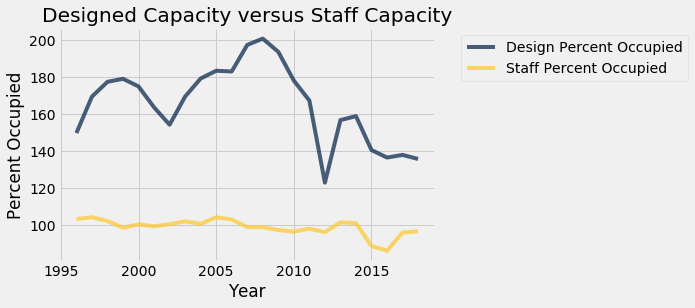

In [48]:
fem_plot_table.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity versus Staff Capacity")


### 3.2 Unique Male Prisoners

We want to observe the changes in male prisons separate from female prisons. In order to do that, we will filter the table to have only male institutions. To do this, we will use the `where()` function which allows us to select the rows that contain male institutions. Another way to think about it is that we are excluding rows with female institutions.

In [49]:
male_data = prisons_updated.where("institution_name", are.not_contained_in(female_institutions))
male_data.show(3)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
6,1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484
8,1996,1,SRTA (SANTA RITA CO. JAIL-RC),811,0,811,395,205.3,750
9,1996,1,RJD (RJ DONOVAN CORRECTIONAL FAC),4577,0,4577,2200,208,4566


### 3.2.1 Design Capacity versus Staff Capacity for Male Institutions

We want to analyze the design and staff capacities over time, so we will use the `select()` function to get relevant data.

In [50]:
male_year_design_staff = male_data.select("year", "total_population", "designed_capacity", "staffed_capacity")
male_year_design_staff.show(3)

year,total_population,designed_capacity,staffed_capacity
1996,4537,2484,4484
1996,811,395,750
1996,4577,2200,4566


In [51]:
male_grouped_year = male_year_design_staff.group("year", sum)
male_grouped_year.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum
1996,1515799,801556,1498610
1997,1619223,839877,1597702
1998,1662254,885820,1665193


Let's begin by getting the male total population. We will do this by selecting the column we are interested in, and then add it to a new variable called `male_total_population`

In [52]:
male_total_population = male_grouped_year.column("total_population sum")

Now we will calculate the design capacity percentages and the staff capacity percentages.

In [53]:
male_design_capacity =  male_grouped_year.column("designed_capacity sum")

male_design_percentage = (male_total_population / male_design_capacity)* 100
male_design_percentage

array([ 189.10706176,  192.79287324,  187.6514416 ,  190.43302577,
        189.58483506,  188.26986429,  188.7134137 ,  190.28339268,
        193.61065069,  190.57552881,  188.89850953,  195.38616189,
        189.57973217,  182.65700591,  178.77529575,  173.6337556 ,
        151.67108148,  144.40785033,  137.91593335,  132.36983713,
        131.50935704,  131.76706454,  131.78131568])

In [54]:
male_staff_capacity =  male_grouped_year.column("staffed_capacity sum")

male_staff_percentage = (male_total_population / male_staff_capacity) *100
male_staff_percentage

array([ 101.14699622,  101.34699712,   99.82350394,   99.86811985,
         99.53535885,   99.49516184,   99.63285895,   99.02889624,
         99.20607427,   98.22028826,   99.95281601,   98.58657586,
         98.64438976,   97.81217575,   98.17054621,   99.14607073,
         98.45594391,  100.0464141 ,   95.01929712,   90.94850361,
         91.76682659,   96.45729307,   96.95383898])

Just as in the female institution example, now we are adding both of these percentages to the table.

In [55]:
male_year_design = male_grouped_year.with_column("Design Percent Occupied", male_design_percentage)
male_year_design.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum,Design Percent Occupied
1996,1515799,801556,1498610,189.107
1997,1619223,839877,1597702,192.793
1998,1662254,885820,1665193,187.651


In [56]:
male_design_and_staff = male_year_design.with_column("Staff Percent Occupied", male_staff_percentage)
male_design_and_staff.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum,Design Percent Occupied,Staff Percent Occupied
1996,1515799,801556,1498610,189.107,101.147
1997,1619223,839877,1597702,192.793,101.347
1998,1662254,885820,1665193,187.651,99.8235


For the plot we only need 3 columns, so we will use the `select()` function to get those columns. 

In [57]:
male_plot_table = male_design_and_staff.select("year", "Design Percent Occupied", "Staff Percent Occupied")
male_plot_table.show(3)

year,Design Percent Occupied,Staff Percent Occupied
1996,189.107,101.147
1997,192.793,101.347
1998,187.651,99.8235


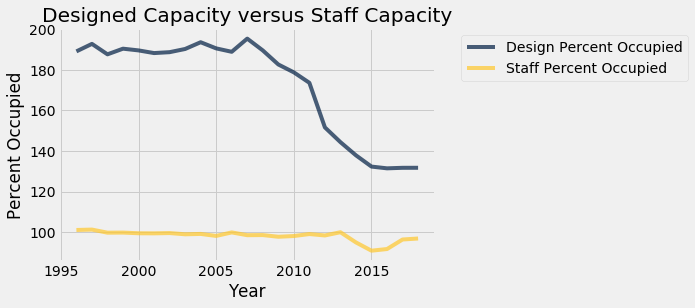

In [58]:
male_plot_table.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity versus Staff Capacity")

### 3.3 Female vs Male prisons: Designed and Staffed Capacities

Although we can compare the two plots side by side to contrast male and female institutions, it would be better to look at them on the same graph, so we will set up the table to plot them together. Here are the two tables we used to draw the plots above. 

In [59]:
fem_plot_table.show(3)

year,Design Percent Occupied,Staff Percent Occupied
1996,149.76,103.204
1997,169.487,104.174
1998,177.507,102.114


In [60]:
male_plot_table.show(3)

year,Design Percent Occupied,Staff Percent Occupied
1996,189.107,101.147
1997,192.793,101.347
1998,187.651,99.8235


Before we merge the two tables, we want to differentiate between the column in `Design Percent Occupied` in the female table versus in the male table. To do this, we will relabel the column names. The function that will relabel to the column names is called `relabel()`. 

The format for the function is: 
- *data_table*.`relabel(`*original_name*, *new_name*`)`

We relabeled the design column and the staff column for both male and female institutions.

In [61]:
male_one_relabeled = male_plot_table.relabeled("Design Percent Occupied", "Male Designed Percentage")
male_one_relabeled.show(3)

year,Male Designed Percentage,Staff Percent Occupied
1996,189.107,101.147
1997,192.793,101.347
1998,187.651,99.8235


In [62]:
male_all_relabeled = male_one_relabeled.relabeled("Staff Percent Occupied", "Male Staffed Percentage")
male_all_relabeled.show(3)

year,Male Designed Percentage,Male Staffed Percentage
1996,189.107,101.147
1997,192.793,101.347
1998,187.651,99.8235


In [63]:
fem_one_relabeled = fem_plot_table.relabeled("Design Percent Occupied", "Female Designed Percentage")
fem_one_relabeled.show(3)

year,Female Designed Percentage,Staff Percent Occupied
1996,149.76,103.204
1997,169.487,104.174
1998,177.507,102.114


In [64]:
fem_all_relabeled = fem_one_relabeled.relabeled("Staff Percent Occupied", "Female Staffed Percentage")
fem_all_relabeled.show(3)

year,Female Designed Percentage,Female Staffed Percentage
1996,149.76,103.204
1997,169.487,104.174
1998,177.507,102.114


Now that we have distinct design and staff capacities for male and female groups, we can match the values by year. They contain information over the same years. To combine tables, we use the function called `join()`. The format for the function is:
- *data_table_one*`.join(` *same_column*, *data_table_two*`)` where same_column is the name of the column that appears in both tables.

In [65]:
male_and_female_table = male_all_relabeled.join("year", fem_all_relabeled)
male_and_female_table.show(3)

year,Male Designed Percentage,Male Staffed Percentage,Female Designed Percentage,Female Staffed Percentage
1996,189.107,101.147,149.76,103.204
1997,192.793,101.347,169.487,104.174
1998,187.651,99.8235,177.507,102.114


### 3.3.1 Designed Capacity: Male versus Female

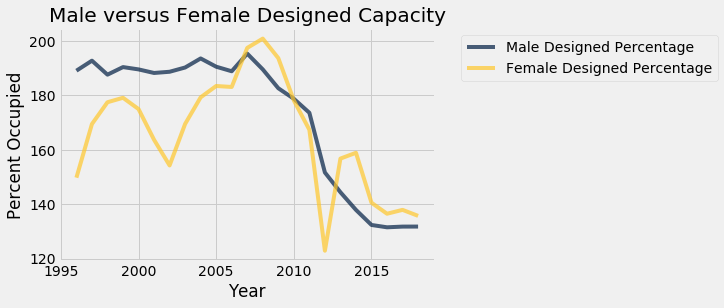

In [66]:
select_design = male_and_female_table.select("year", "Male Designed Percentage", "Female Designed Percentage")

select_design.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male versus Female Designed Capacity")

### 3.3.2 Staffed Capacity: Male versus Female

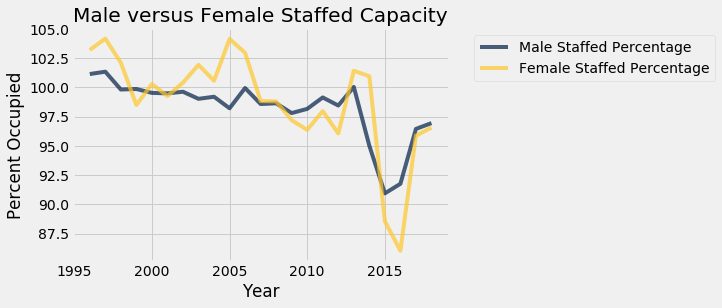

In [69]:
select_staff = male_and_female_table.select("year", "Male Staffed Percentage", "Female Staffed Percentage")

select_staff.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male versus Female Staffed Capacity")

### 3.3.3 Male Prisons versus Female Prisons in both Staffed and Designed Capacity


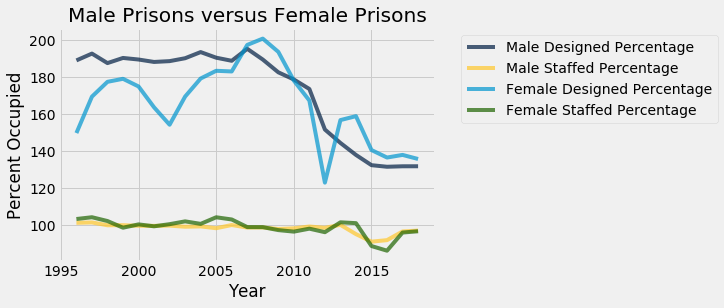

In [70]:
male_and_female_table.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male Prisons versus Female Prisons")

How does the combination of male and female institutions compare with the individual institutions? To answer this question, let's look back to the beginning where we defined the table called `compare_table_design_and_staff`.

In [71]:
compare_table_design_and_staff.show(3)

year,Design Percentage,Staff Percentage
1996,185.859,101.281
1997,190.978,101.537
1998,186.899,99.9814


We want to combine the total percentages table with the table that contains the percentages for male and female prisons separately. To combine the two tables, we will use the `join()` function from the last section. Here is the format:
- *data_table_one*`.join(` *same_column*, *data_table_two*`)` where same_column is the name of the column that appears in both tables.

In [72]:
all_joined = compare_table_design_and_staff.join("year", male_and_female_table)
all_joined.show(3)

year,Design Percentage,Staff Percentage,Male Designed Percentage,Male Staffed Percentage,Female Designed Percentage,Female Staffed Percentage
1996,185.859,101.281,189.107,101.147,149.76,103.204
1997,190.978,101.537,192.793,101.347,169.487,104.174
1998,186.899,99.9814,187.651,99.8235,177.507,102.114


To view all of the design percentages, we must select those columns from the table using the `select()` function. With those columns, we can use the `plot()` function to display the data.

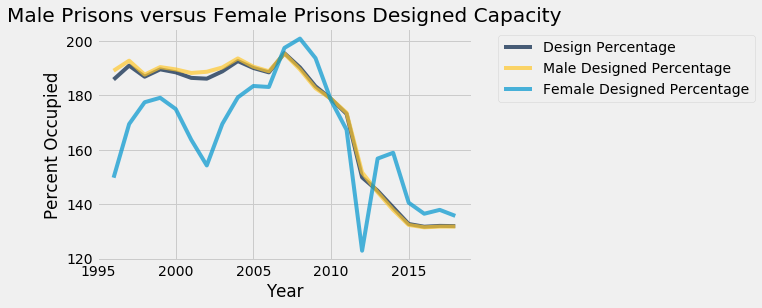

In [73]:
design_all = all_joined.select("year", "Design Percentage", "Male Designed Percentage", "Female Designed Percentage")
design_all.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male Prisons versus Female Prisons Designed Capacity")

To view all of the staff percentages, we must select those columns from the table using the `select()` function. With those columns, we can use the `plot()` function to display the data.

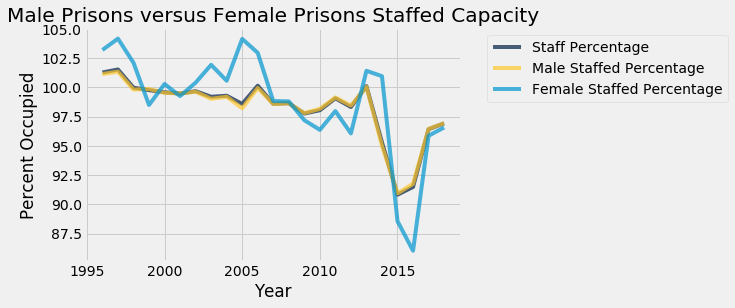

In [74]:
staff_all = all_joined.select("year", "Staff Percentage", "Male Staffed Percentage", "Female Staffed Percentage")
staff_all.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male Prisons versus Female Prisons Staffed Capacity")

Here are all the plots together on the same plot.

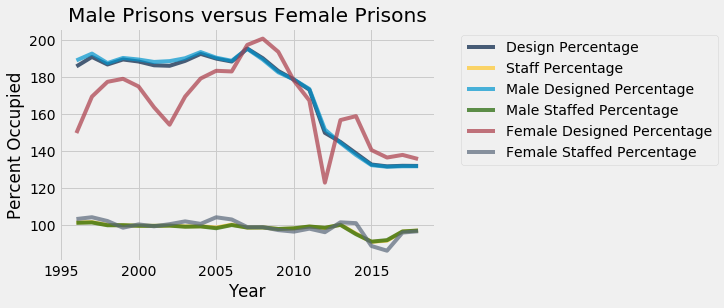

In [75]:
all_joined.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male Prisons versus Female Prisons")

### Question 1
**Comment on the plot above. What are some similarities we about th designed capacity of prisons in California? What are the differences between designed and staffed capacity? What are some patterns unique to female institutions? Why does the total population look almost identical to the male prisons percentages?**

*double click this cell to type your response*